# Data import

In [170]:
import pandas as pd

file = open('ff7.txt', 'r')
lines = file.readlines()
input_data = pd.Series(lines).apply(float)
input_data.describe()

count    65536.000000
mean       180.210178
std        104.230655
min        -12.540000
25%         90.980000
50%        180.500000
75%        270.400000
max        368.300000
dtype: float64

# 1. Pre-analysis

## Graph

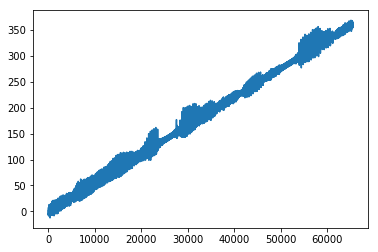

In [171]:
import matplotlib.pyplot as plt
import numpy as np

indexes = np.arange(1,len(input_data)+1)
plt.plot(indexes, input_data)
plt.show()

## Mean

In [172]:
mean = input_data.mean()
mean

180.21017765037539

## Variance

In [173]:
variance = np.var(input_data)
variance

10863.863657372265

## Histogram

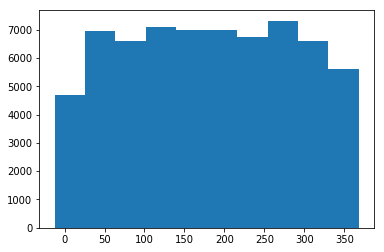

In [174]:
plt.hist(input_data)
plt.show()

## Data normalization

In [183]:
data = input_data.apply(lambda x: (x-mean)/variance)
data

0       -0.017114
1       -0.017172
2       -0.017177
3       -0.016965
4       -0.016636
5       -0.016717
6       -0.016690
7       -0.016805
8       -0.016931
9       -0.017040
10      -0.017201
11      -0.017130
12      -0.016526
13      -0.016374
14      -0.016334
15      -0.015895
16      -0.016915
17      -0.016626
18      -0.016726
19      -0.016759
20      -0.017124
21      -0.016523
22      -0.016717
23      -0.017346
24      -0.016298
25      -0.016477
26      -0.016649
27      -0.016120
28      -0.016320
29      -0.017122
           ...   
65506    0.016614
65507    0.016890
65508    0.016559
65509    0.016825
65510    0.016798
65511    0.016549
65512    0.016678
65513    0.016172
65514    0.016025
65515    0.016154
65516    0.016034
65517    0.016540
65518    0.016825
65519    0.016467
65520    0.016844
65521    0.016660
65522    0.016172
65523    0.016706
65524    0.016282
65525    0.016218
65526    0.016319
65527    0.016531
65528    0.016844
65529    0.016927
65530    0

## Correlation function

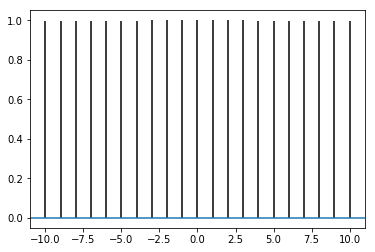

In [176]:
plt.acorr(data)
plt.show()

## Conclusion
Graph: Looks like a line (linear correlation)  
Histogram: data is equally distributed  
Correlation function: ...

# 2. Analysis of variance

# 3. Regression analysis

## Polynomial trend

In [177]:
xs = pd.Series(indexes)
ys = data

trend = np.polyfit(xs, ys, 1)

def linear_trend_f(x):
    return(trend[1] + trend[0]*x)

y = xs.apply(linear_trend_f) 

trend = np.polyfit(xs, ys, 2)

def quadratic_trend_f(x):
    return(trend[2] + trend[1]*x + trend[0]*x**2)

trend

array([ 7.63625543e-15,  5.05783508e-07, -1.65846996e-02])

[-2.99318024e-06  1.00003571e+00  1.45778180e-06  1.00002048e+00]


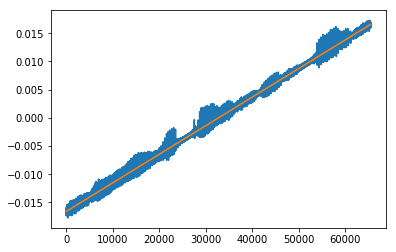

In [184]:
from scipy import optimize

def sin_cos_func(x, a, b, c, d):
    return a * np.sin(b*x) + c * np.cos(d*x)

params, params_covariance = optimize.curve_fit(sin_cos_func, xs, ys)

print(params)
# y = xs.apply(lambda x: sin_cos_func(x, params[0], params[1], params[2], params[3])) 
# y = xs.apply(linear_trend_f) 
y = xs.apply(quadratic_trend_f) 

plt.plot(xs, ys)
plt.plot(xs, y)
plt.show()

## Graph

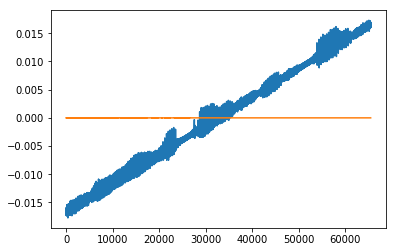

In [179]:
plt.plot(xs, ys)
plt.plot(xs, y)
plt.show()

## Model adequacy

### Error

In [180]:
error = sum(xs.apply(lambda x: (linear_trend_f(x) - ys[x-1])**2))
error

6.032476131774141

### S

In [181]:
S = (((y - y.mean())**2).sum()) / (len(y)-1)
S

3.5397067972884505e-12

In [182]:
F = 1
if S / error <= F:
    print('Model is adequate')
else:
    print('Model is not adequate')

Model is adequate
